In [1]:
import scipy.stats as ss
import statsmodels.stats.power as smp
import numpy as np
from statsmodels.stats.power import TTestIndPower
import pandas as pd
import matplotlib.pyplot as plt

https://docs.scipy.org/doc/scipy/reference/stats.html

https://www.statsmodels.org/stable/stats.html

In [2]:
path = '/home/lean/Documentos/Lean/SBG/Base_de_calcio/DiversidadConformacionalCBS/MCU/cavidb/'
cavidb_modelos = pd.read_json(path + 'af.results_lean.json')
cavidb_modelos.head()

,_id,pdb_id,chain_id,model_id,uniprot_id,seqres_id,ocid,sequence,global_descriptors,peptide_descriptors,...,max_pocket_length,pdb_file,resolution,structure_method,missing_residues,missing_residues_count,mean_aggrescan_score,links,updated_at,updated_in
0,644d8316fa890b0d12397094,4nsc,A,F283L_MODEL_1,NaN,NaN,42X6YZOL2WP7GUREL0QHUTQN7NVYCXC4EC0143T8K5X2NA...,MFRLNSLSALAELAVGSRWYHGGSQPIQIRRRLMMVAFLGASAVTA...,"{'isoelectric_point': 6, 'instability_index': ...","{'aa_selectivity_index': 2.5, 'argos_hydrophob...",...,30,ATOM 1 N MET A 1 34.812 -54.469...,NaN,unknown,[],0,-0.972525,"[[25, KAK, 0.48387096774193505], [42, KAM, 0.4...",2023-04-29 17:50:30.018000+00:00,mumuki
1,644d806efa890b0d12396edf,4nsc,A,F283L_MODEL_4,NaN,NaN,42X6YZOL2WP7GUREL0QHUTQN7NWHV9ACEC0143T8K5X2NA...,MFRLNSLSALAELAVGSRWYHGGSQPIQIRRRLMMVAFLGASAVTA...,"{'isoelectric_point': 6, 'instability_index': ...","{'aa_selectivity_index': 2.5, 'argos_hydrophob...",...,28,ATOM 1 N MET A 1 -23.422 -31.594...,NaN,unknown,[],0,-1.029622,"[[44, KAM, 0.5882352941176471], [42, KAA, 0.33...",2023-04-29 17:39:10.840000+00:00,mumuki
2,644d8065fa890b0d12396ed5,4nsc,A,F283L_MODEL_3,NaN,NaN,42X6YZOL2WP7GUREL0QHUTQN7NVOLRD0EC0143T8K5X2NA...,MFRLNSLSALAELAVGSRWYHGGSQPIQIRRRLMMVAFLGASAVTA...,"{'isoelectric_point': 6, 'instability_index': ...","{'aa_selectivity_index': 2.5, 'argos_hydrophob...",...,30,ATOM 1 N MET A 1 -36.594 -24.219...,NaN,unknown,[],0,-1.044212,"[[52, KAS, 0.74074074074074], [48, KAM, 0.5454...",2023-04-29 17:39:01.500000+00:00,mumuki
3,644d8046fa890b0d12396ebf,4nsc,A,F283L_MODEL_5,NaN,NaN,42X6YZOL2WP7GUREL0QHUTQN7NW843B8EC0143T8K5X2NB...,MFRLNSLSALAELAVGSRWYHGGSQPIQIRRRLMMVAFLGASAVTA...,"{'isoelectric_point': 6, 'instability_index': ...","{'aa_selectivity_index': 2.5, 'argos_hydrophob...",...,25,ATOM 1 N MET A 1 47.406 -16.438...,NaN,unknown,[],0,-1.025511,"[[25, KAT, 0.555555555555555], [12, KAL, 0.469...",2023-04-29 17:38:30.008000+00:00,mumuki
4,644d8028fa890b0d12396eac,4nsc,A,F283L_MODEL_2,NaN,NaN,42X6YZOL2WP7GUREL0QHUTQN7NVEULDWEC0143T8K5X2NA...,MFRLNSLSALAELAVGSRWYHGGSQPIQIRRRLMMVAFLGASAVTA...,"{'isoelectric_point': 6, 'instability_index': ...","{'aa_selectivity_index': 2.5, 'argos_hydrophob...",...,34,ATOM 1 N MET A 1 79.812 15.781...,NaN,unknown,[],0,-0.958841,"[[38, KAG, 0.5454545454545451], [33, KAM, 0.4]...",2023-04-29 17:38:00.485000+00:00,mumuki


In [3]:
cavidb_modelos.columns

Index(['_id', 'pdb_id', 'chain_id', 'model_id', 'uniprot_id', 'seqres_id',
       'ocid', 'sequence', 'global_descriptors', 'peptide_descriptors',
       'fraction_of_expanding_residues', 'all_phosphorylatable_sites',
       'length', 'net_charge', 'count_negative_res', 'count_positive_res',
       'count_neutral_res', 'fraction_of_negative_residues',
       'fraction_of_positive_residues', 'aa_fraction_residues',
       'mean_net_charge', 'delta_value', 'delta_max_value',
       'fraction_of_aa_promoting_disorder_residues', 'count_amino_acids',
       'get_amino_acids_percent', 'molecular_weight', 'helix_fraction',
       'turn_fraction', 'sheet_fraction',
       'reduced_molar_extinction_coefficient',
       'oxidized_molar_extinction_coefficient', 'alphafold',
       'radius_of_gyration', 'pockets', 'pykvfinder_pockets', 'residues',
       'created_at', 'created_in', 'pockets_count', 'druggable_pockets_count',
       'lowest_residue_position', 'highest_residue_position',
       'max

In [4]:
pockets_table = pd.DataFrame(cavidb_modelos['pockets'].values.tolist(), index=cavidb_modelos.index)

print (pockets_table)

                                                   0   \
0   {'pocket_id': 1, 'pocket_score': 0.3113, 'drug...   
1   {'pocket_id': 1, 'pocket_score': 0.1584, 'drug...   
2   {'pocket_id': 1, 'pocket_score': 0.21760000000...   
3   {'pocket_id': 1, 'pocket_score': 0.2622, 'drug...   
4   {'pocket_id': 1, 'pocket_score': 0.1061, 'drug...   
5   {'pocket_id': 1, 'pocket_score': 0.1584, 'drug...   
6   {'pocket_id': 1, 'pocket_score': 0.1928, 'drug...   
7   {'pocket_id': 1, 'pocket_score': 0.2622, 'drug...   
8   {'pocket_id': 1, 'pocket_score': 0.1932, 'drug...   
9   {'pocket_id': 1, 'pocket_score': 0.0916, 'drug...   
10  {'pocket_id': 1, 'pocket_score': 0.19140000000...   
11  {'pocket_id': 1, 'pocket_score': 0.21760000000...   
12  {'pocket_id': 1, 'pocket_score': 0.1107, 'drug...   
13  {'pocket_id': 1, 'pocket_score': 0.115, 'drug_...   
14  {'pocket_id': 1, 'pocket_score': 0.294, 'drug_...   
15  {'pocket_id': 1, 'pocket_score': 0.1226, 'drug...   
16  {'pocket_id': 1, 'pocket_sc

In [5]:
cavidb_modelos_sampling = cavidb_modelos.sample(n = 10)

In [6]:
pdb_4nsc = cavidb_modelos[cavidb_modelos['pdb_id']=='4nsc']
pdb_4nsd = cavidb_modelos[cavidb_modelos['pdb_id']=='4nsd']

In [7]:
ss.shapiro(cavidb_modelos['radius_of_gyration'])

ShapiroResult(statistic=0.931483268737793, pvalue=0.09404389560222626)

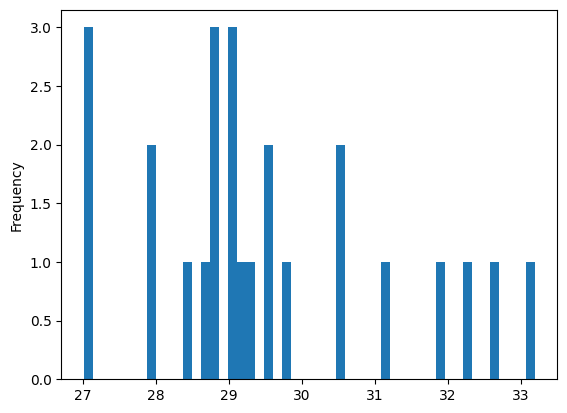

In [8]:
plt.hist(cavidb_modelos['radius_of_gyration'], bins=50)
plt.ylabel('Frequency');

In [9]:
effect_size = abs((cavidb_modelos['radius_of_gyration'].max()-cavidb_modelos['radius_of_gyration'].min())/cavidb_modelos['radius_of_gyration'].std())   # diferencia de medias esperada
alpha = 0.05      # nivel de significancia
power = 0.8       # potencia
ratio = 1         # relación entre los tamaños de las muestras
n = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
print("El tamaño muestral necesario es:", round(n))

El tamaño muestral necesario es: 3


In [10]:
# Calcular la media y la desviación estándar de los datos existentes
datos_mean1 = np.mean(pdb_4nsc['radius_of_gyration'])
datos_mean2 = np.mean(pdb_4nsd['radius_of_gyration'])
datos_std = np.std(cavidb_modelos['radius_of_gyration'], ddof=1)

# Definir los parámetros de la prueba
effect_size = abs(datos_mean1 - datos_mean2)/ datos_std
alpha = 0.05
power = 0.8

# Crear una instancia de la clase TTestIndPower
ttp = TTestIndPower()

# Calcular el tamaño muestral necesario
n = ttp.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1.0, alternative='two-sided')

# Imprimir el resultado
print("El tamaño muestral necesario es:", round(n))


El tamaño muestral necesario es: 119812


In [11]:
ss.ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided', keepdims=False)

NameError: name 'a' is not defined

In [ ]:
ss.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
ss.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')

In [ ]:
ss.chisquare(f_obs, f_exp=None, ddof=0, axis=0)

In [ ]:
ss.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', method='auto')
ss.ks_2samp(data1, data2, alternative='two-sided', method='auto')
ss.ks_1samp(x, cdf, args=(), alternative='two-sided', method='auto')

In [ ]:
ss.mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', axis=0, method='auto', nan_policy='propagate', keepdims=False)

In [ ]:
ss.wilcoxon(x, y=None, zero_method='wilcox', correction=False, alternative='two-sided', method='auto', axis=0, nan_policy='propagate', keepdims=False)

In [ ]:
ss.levene(samples, center='median', proportiontocut=0.05)

In [ ]:
ss.binomtest(x, n=None, p=0.5, alternative='two-sided')